***

In [10]:
import numpy as np

import matplotlib.pyplot as plt

from gn import GaussianNewton
from viz import plot_gn

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gaussian-Newton algorithm

In [2]:
# Hyperparameters
NOISE = 3
COEFFICIENTS = [-0.001, 0.1, 0.1, 2, 15]

In [3]:
def hypothesis(X, coeff):
    """
    Hypothesis function for a given model
    """
    return coeff[0] * x ** 3 + coeff[1] * x ** 2 + coeff[2] * x + coeff[3] + coeff[4] * np.sin(x)

In [4]:
x = np.arange(1, 100)
y = hypothesis(x, COEFFICIENTS)
yn = y + NOISE * np.random.randn(len(x))

gn = GaussianNewton(hypothesis=hypothesis, 
                   max_iter=100, 
                   tolerance_difference=1e-6)

init_guess=np.ones(len(COEFFICIENTS))

In [8]:
_ = gn.fit(x, yn, init_guess=init_guess)
estimates = gn.get_estimate()
residual = gn.get_residual()

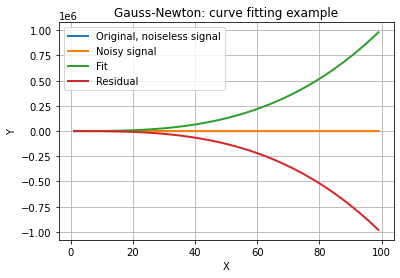

In [12]:
plot_gn(x, y, yn, estimates, residual)